## Módulo 3: Visualización de datos: Matplotlib

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmonce/datascience/blob/master/src/Intro_Matplotlib.ipynb)


En este notebook describiremos brevemente Matplotlib, la principal biblioteca para visualización de datos de Python, construida sobre NumPy, y que funciona sobre diferentes plataformas y formatos de salida. En esta introducción pondremos más que nada énfasis en cómo generar y customizar plots con Matplotlib, sin entrar en los detalles de los diferentes tipos, que pueden encontrarse en la documentación.

Referencias:
- El notebook está basado principalmente en la sección [Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) del libro "Python Data Science Cookbook" de Jack VanderPlas. 



In [61]:
import numpy as np
import pandas as pd


### 1. Uso

Hay diferentes formas de utilizar Matplotlib, que llevan a veces a confusión. En esta sección se explican las principales, dependiendo ligeramente de la plataforma de salida. Para importar matplotlib, lo usual es utilizar su interfaz `pyplot`, por lo que importaremos ambas bibliotecas. También especificaremos el stilo para la estética de los gráficos (puede ver [aquí](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html) una lista de estilos disponibles). 

        

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Estilo clásico para gráficos, puede a
plt.style.use('classic')

# Este notebook fue realizado con la versión 3.1.1 de Matplotlib
print(mpl.__version__)

3.1.1


Existe una diferencia importante entre el uso de Matplotlib en un script Python o desde Jupyter. En el primer caso, como no estamos ante un entorno interactivo, debemos ejecutar `plt.show()` una vez en el script para desplegar todas las figuras necesarias utilizando el backend gráfico del sistema.

En cambio, si estamos utilizando Jupyter, podemos utilizar el comando `%matplotlib` para entrar en lo que se llama "modo Matplotlib". Una vez activado, cualquier llamada a un comando de `plt` hará que las figuras y plots se actualicen automáticamente (excepto algunos como el cambio de atributos de líneas o puntos ya dibujados, que necesitarán una llamada explícita a `plt.draw()` para refrescar la figura. 

In [5]:
%matplotlib inline

La opción _inline_ anterior indica que, cuando ejecutemos un comando de `plt`, el gráfico se desplegará como una figura estática en el notebook. Alternativamente, la opción `notebook` incluirá un gráfico interactivo en el notebook.

Existen dos interfaces diferentes para utilizar Matplotlib. La primera es estilo Matlab: en este caso, tenemos una interfaz _stateful_: existen una figura y un _axe_ actuales (los axes o paneles son cada uno de los gráficos en una figura, ya que puede haber más de uno), donde se reflejarán los ploteos que se realicen.

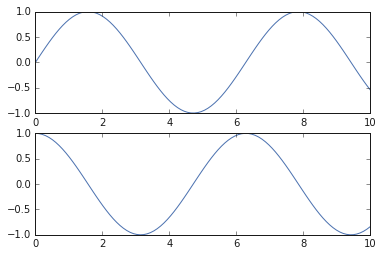

In [6]:
plt.figure()  # creamos una figura

x = np.linspace(0, 10, 100)

# creamos el primero de dos panales
plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.plot(x, np.sin(x))

# creamos el segundo panel
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Alternativamene, podemos utilizar una interfaz orientada a objetos para tener más control sobre la figura. Para esto, se crean los objetos correspondientes a figuras y axes, y se los manipula directamente a través de sus métodos:

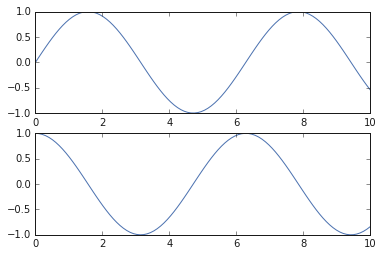

In [7]:
# El primer comando nos va a crear la figura, y un array de dos subplots, que se almacenan en el array ax
fig, ax = plt.subplots(2)

# Llamamos al método plot en cada uno de los axes, para obtener el mismo resultado que en el caso anterior.
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

### 2. Subplots

Matplotlib permite (como se vio en el ejemplo anterior) mostrar más de un panel en la misma figura. La forma más directa es a través del comando `axes()`, que recibe cuatro parámetros, indicando respectivamente izquierda, abajo, ancho, alto para especificar el axe, siempre referido al sistema de coordenadas de la figura, que van desde (0,0) abajo a la izquierda a (1,1) arriba a la derecha. Las siguientes dos llamadas muestran cómo construir un axe dentro del otro, en la misma figura:

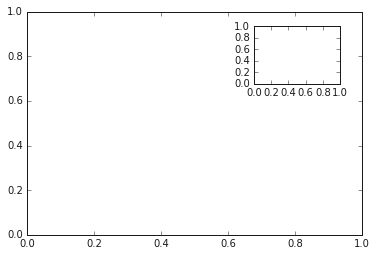

In [8]:
ax1=plt.axes() # Ocupa el 100 de la figura

# Comienza a 0.65 desde la izquierda, 0.65 desde abajo, y ocupa un 20% del ancho y del alto de la figura
ax2=plt.axes([0.65, 0.65, 0.2,0.2]) 


Alternativamente, podemos especificar lo mismo utilizando el modo orientado a objetos (obsérvese que en el primer axe hay que explicitar los valores del vector de ubicaciòn).

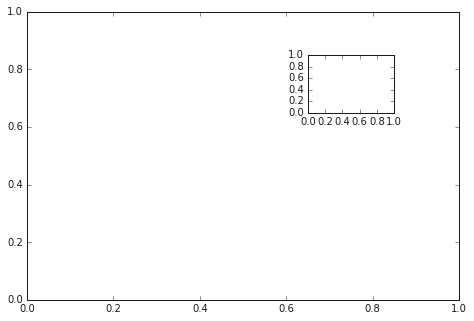

In [9]:
%matplotlib inline
fig=plt.figure()
ax1=fig.add_axes([0.0,0.0,1.0,1.0])
ax2=fig.add_axes([0.65, 0.65, 0.2,0.2])
#x = np.linspace(0, 10)
#ax1.plot(np.sin(x))
#ax2.plot(np.cos(x));


Una forma usual de generar rápidamente varios gráficos comparados es utilizar una grilla de subplots. En el ejemplo siguiente, cada llamada a add_subplot agrega un plot en la posición (filas, columnas, número de panel):

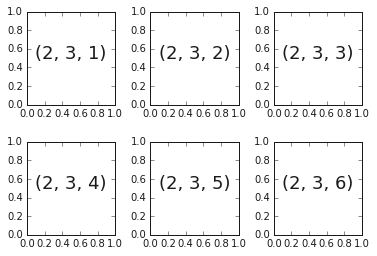

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Existe un comando especial que crea todo al mismo tiempo: `subplots`: 


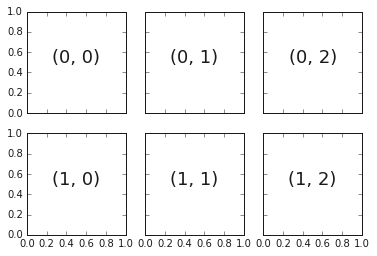

In [11]:
# Creamos toda la grilla 2x3, y les decimos que no ponga ticks interiores
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# En ax tenemos indexado por fila columna cada uno de los paneles
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')


### 3. Line Plots

Con lo aprendido en los puntos anteriores, podemos empezar a ver rápidamente los tipos de plots que permite Matplotlib, con algunos tips para ajustar la apariencia. La cantidad de opciones son enormes, aquí solamente se presentará una guía general. Empecemos por los line plots, que permiten mostrar una o más funciones en una grilla bidimensional: 

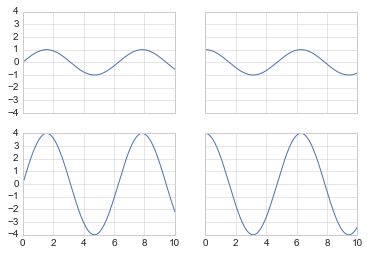

In [12]:
# Cambiamos el estilo 
plt.style.use('seaborn-whitegrid')

# Creamos la figura y 4 para mostrar 4 funciones a la vez
# Le decimos que compartan el eje de las ordenadas para que todos queden con la misma escala
fig, ax = plt.subplots(2,2, sharex='col', sharey='all')

# Valores de x, mil puntos equiespaciados entre 0 y 10 
x = np.linspace(0, 10, 1000)

# Ploteamos en cada axe una curva diferente
ax[0,0].plot(x,np.sin(x))
ax[0,1].plot(x,np.cos(x))
ax[1,0].plot(x,4*np.sin(x))
ax[1,1].plot(x,4*np.cos(x))


Podemos hacer que las 4 gràficas aparezcan superpuestas en el mismo plot. Utilizaremos esta vez el formato matlab

Text(0, 0.5, 'y')

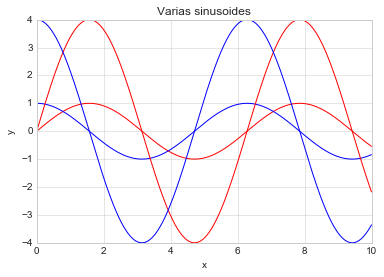

In [13]:
fig=plt.figure()
ax=plt.axes()

x = np.linspace(0, 10, 1000)

# Ploteamos en el axe actual 4 curvas diferentes
# Dibujamos los senos en rojo y los cosenos en azul
plt.plot(x,np.sin(x),color='red')
plt.plot(x,np.cos(x), color='blue')
plt.plot(x,4*np.sin(x), color='red')
plt.plot(x,4*np.cos(x), color='blue')

# Le ponemos un tìtulo y tìtulos a los ejes, por supuesto
plt.title("Varias sinusoides")
plt.xlabel("x")
plt.ylabel("y")


### 4. Histogramas

Dado un conjunto de datos, un histograma es una representaciòn de esos datos como barras, donde cada barra es proporcional a la ocurrencia de cada elemento en el conjunto. Sirven para tener una idea de la distribuciòn de los datos en el conjunto. En Matplotlib, el despliegue de un histograma a partir de un array es pràcticamente directo: 

(array([  5.,  16.,  52., 110., 194., 227., 195., 132.,  49.,  20.]),
 array([-3.24642254, -2.6637964 , -2.08117027, -1.49854413, -0.91591799,
        -0.33329185,  0.24933429,  0.83196043,  1.41458656,  1.9972127 ,
         2.57983884]),
 <a list of 10 Patch objects>)

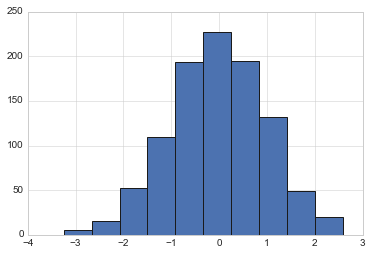

In [14]:
data = np.random.randn(1000) # Mil nùmeros extraídos de una distribución normal estándar
plt.hist(data)


Versión con ajustes, para que quede más lindo:

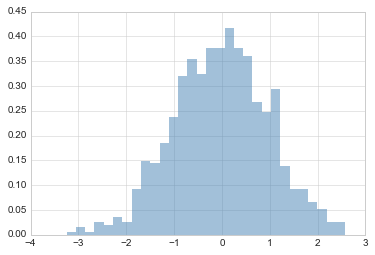

In [15]:
# Cambios: agrupamos en 30 bins (por defecto se ponen 10), los datos están normalizados, tiene colores 
# pero no en los bordes, y es semitransparente
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

Podemos superponer histogramas, usando el parámetro alpha para dar transparencia:

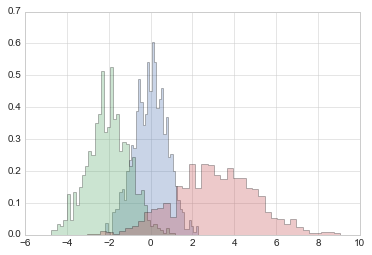

In [16]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# Especifico los argumentos una sola vez. El color no lo especifico para que lo determine automàticamente. 
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### 4. Seaborn

Seaborn es una biblioteca construida sobre Matplotlib que permite cambiar los estilos de una forma fácil, y agrega algunas visualizaciones de más alto nivel para gráficos comunes en estadística. Aquí presentaremos, igual que en el resto del notebook, una idea general para permitir al lector orientarse sobre cuáles posibilidades ofrece Seaborn. 

Lo primero, es que Seaborn ofrece una cantidad de comportamientos por defecto más "modernos" que los de Matplotlib, así que basta con importar y setearlos para cambiar los gráficos en general.

In [20]:
import seaborn as sns




Comparemos el mismo gráfico con y sin Seaborn

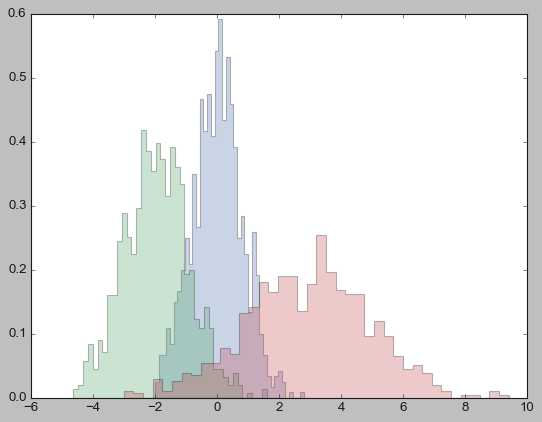

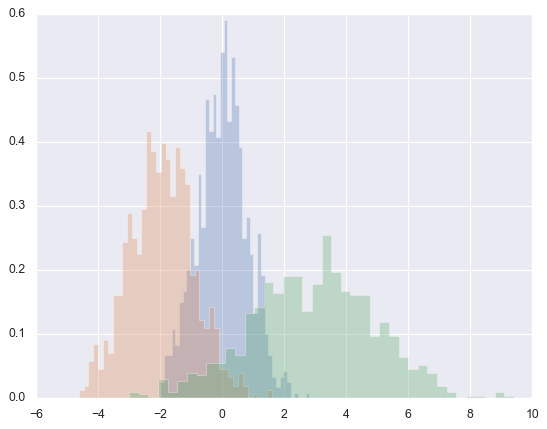

In [21]:
plt.style.use('classic')
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# Especifico los argumentos una sola vez. El color no lo especifico para que lo determine automàticamente. 
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

sns.set()

fig=plt.figure()
ax=plt.axes()

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);



Tal vez hayan notado que el segundo gráfico es muy parecido al que antes presentamos utilizando Matplotlib. Esto es efectivamente así: la funcionalidad `plt.style.use` apareció en las versiones más recientes de Matplotlib, y permite ajustar los estilos directamente en Matplotlib, incluido un look similar a Seaborn.


Algunos plots de seaborn son muy interesantes para la visualización estadística. Solamente como ejemplo, mostraremos el Pair Plot, donde se muestran las relaciones entre pares de atributos de un conjunto de ejemplos. Siguiendo al material referido al comienzo, mostraremos un Pair Plot que utiliza el Iris Dataset:

In [22]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


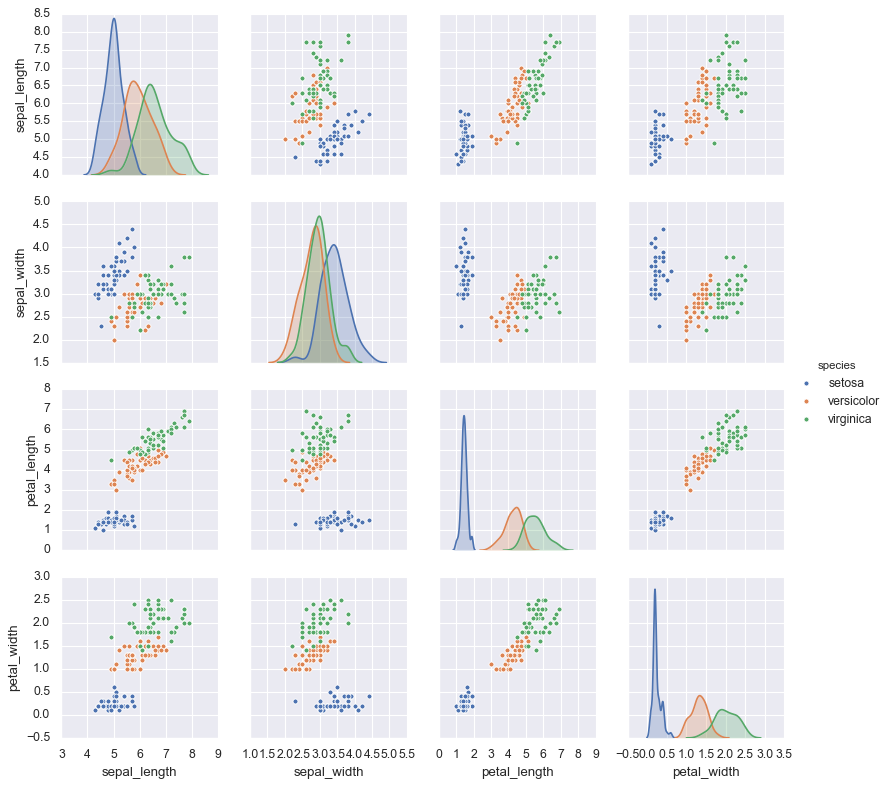

In [24]:
sns.pairplot(iris,hue='species', height=2.5)

En este [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) del libro de Jack VanDerPlast se muestra un excelente ejemplo de cómo se pueden entender los datos utilizando Seaborn. Lo reproduciremos con algunos comentarios (y algunos pequeños cambios en el manejo de los deltas de tiempo, que utilizan funciones deprecadas)

In [27]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [58]:
import datetime

def convert_time(s):
    h,m,s=map(int,s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

# Importamos, y convertimos la columna de tiempos a un tipo propio de NumPy
data= pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})

# Agregamos columnas que  muestran el tiempo en segundos
data['split_sec'] = data['split'] / np.timedelta64(1, 's')
data['final_sec'] = data['final'] / np.timedelta64(1,'s')

data.head()



,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


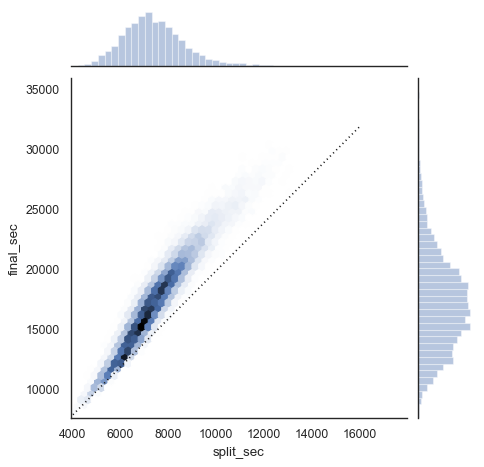

In [59]:
# Realizamos un joinplot para ver cómo se comparan los tiempos entre la mitad y el final
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

El ejercicio sigue, recomendamos leerlo, con sus comentarios. 